# Lesson outline

Pandas makes it very convenient to compute various statistics on a dataframe:  

* Global statistics: mean, median, std, sum, etc. 
* Rolling statistics: rolling_mean, rolling_std, etc.

You will use these functions to analyze stock movement over time.  
  
Specifically, you will compute:

* Bollinger Bands: A way of quantifying how far stock price has deviated from some norm.
* Daily returns: Day-to-day change in stock price.


## Global Statistics
---

![](img/1.png)

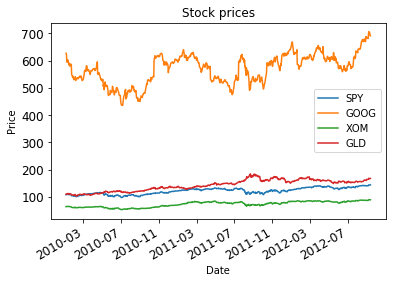

SPY     121.711206
GOOG    568.941941
XOM      73.296221
GLD     142.603279
dtype: float64

In [11]:
# Compute global statistics

import util
import pandas as pd
import matplotlib.pyplot as plt

dates = pd.date_range('2010-01-01', '2012-12-31')
symbols = ['SPY', 'GOOG', 'XOM', 'GLD']
df = util.get_data(symbols, dates)
util.plot_data(df)
plt.show()

df.mean()

## Rolling Statistics
---
![](img/2.png)

## Bollinger Bands
---

![image.png](img/3.png)

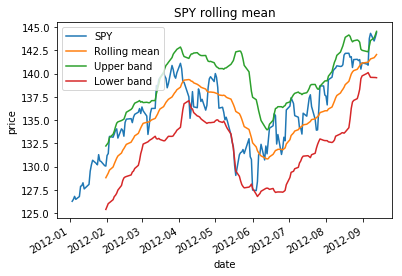

In [31]:
# Computing Rolling Statistics

dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = util.get_data(symbols, dates)

ax = df['SPY'].plot(title="SPY rolling mean", label="SPY")
# rm_spy = pd.rolling_mean(df['SPY'], window=20)  deprecated
rm_spy = df['SPY'].rolling(20).mean()
rm_spy.plot(label="Rolling mean", ax=ax)

upper_band = rm_spy + 2*df['SPY'].rolling(20).std()
lower_band = rm_spy - 2*df['SPY'].rolling(20).std()
upper_band.plot(label="Upper band", ax=ax)
lower_band.plot(label="Lower band", ax=ax)

ax.set_xlabel("date")
ax.set_ylabel("price")
ax.legend(loc="upper left")
plt.show()
